In this notebook: 

- Figure 2B,C: Riboswitch Kfold-lig ranking

- Figure ED5: All package types for Ribologic FMN data

- Figure ED6: scatterplots for select package types for all rounds

- Figure ED7b: Kfold-lig ranking separated by ligand type

- Figure ED7c: Kfold-lig ranking by Spearman correlation

- Figure ED7d: Kfold+lig ranking

- Figure ED7e: AR ranking

- Figure ED10a: Kfold-lig vs. Kfold+lig

- Figure ED10b: All Kfold + lig predictions for Ribologic FMN data

In [2]:
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import os

import eternabench as eb

Populating the interactive namespace from numpy and matplotlib


(5.6, 6.199999999999999) [3.5999999999999996, 2]


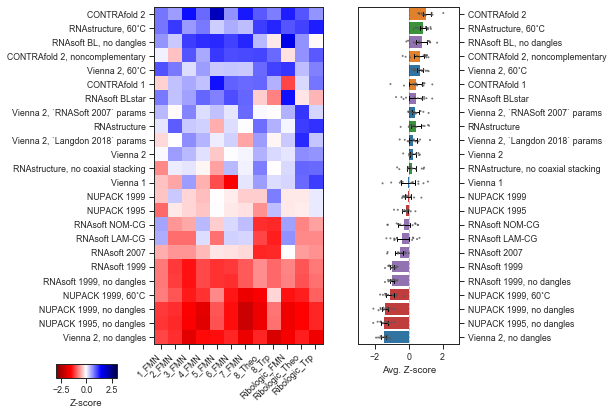

In [3]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_pearson_zscores.csv')
eb.plot.ranked_heatmap(zscores, vmin=-3, vmax=3,size=2)

savefig('FIGURES/2/Figure_2BC_26May2022.pdf',bbox_inches='tight')

(5.6, 2.5999999999999996) [3.5999999999999996, 2]


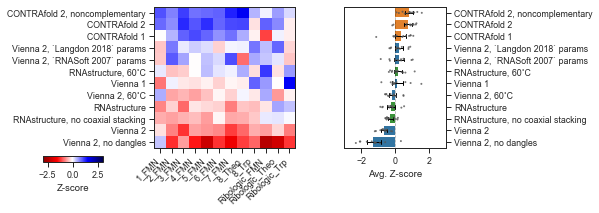

In [35]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_Z_pearson_logkd_lig_scaled_zscores.csv')
eb.plot.ranked_heatmap(zscores, vmin=-3, vmax=3,size=2)
savefig('FIGURES/SI/ED7_+lig_ranking.pdf',bbox_inches='tight')

(5.6, 2.5999999999999996) [3.5999999999999996, 2]


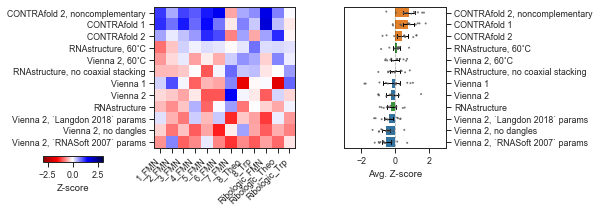

In [24]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_Z_pearson_log_AR_zscores.csv')
eb.plot.ranked_heatmap(zscores, vmin=-3, vmax=3,size=2)
savefig('FIGURES/SI/ED7_AR_ranking.pdf',bbox_inches='tight')

(5.6, 6.199999999999999) [3.5999999999999996, 2]


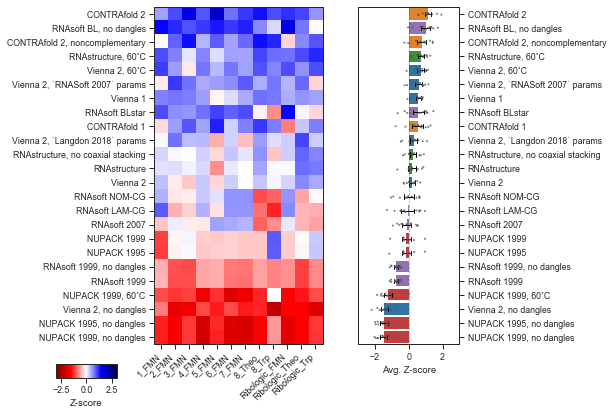

In [4]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_spearman_zscores.csv')
eb.plot.ranked_heatmap(zscores, metric='spearman_zscore_by_Dataset_mean', vmin=-3, vmax=3, size=2)

savefig('FIGURES/SI/ED7_spearman_ranking.pdf',bbox_inches='tight')

(4.4, 6.199999999999999) [2.4, 2]
(2.6, 6.199999999999999) [0.6, 2]
(2.6, 6.199999999999999) [0.6, 2]


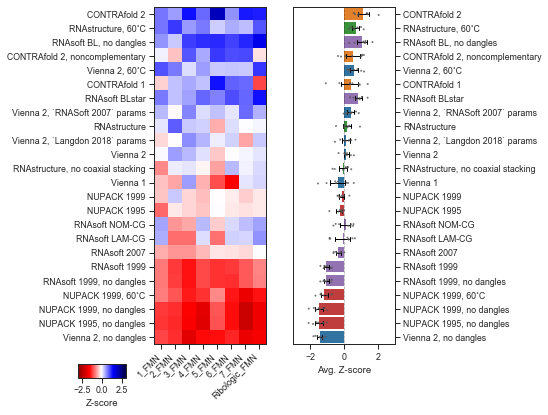

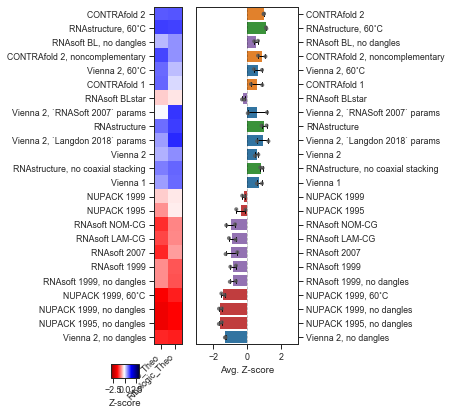

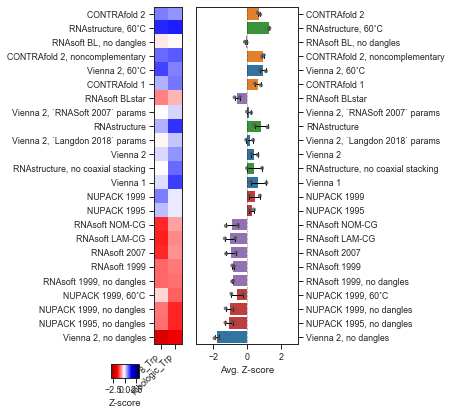

In [5]:
# across different ligand types
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_pearson_zscores.csv')

eb.plot.ranked_heatmap(zscores.loc[zscores.Dataset.str.endswith('FMN')], vmin=-3, vmax=3,size=2)
savefig('FIGURES/2/FMN_only.pdf',bbox_inches='tight')

eb.plot.ranked_heatmap(zscores.loc[zscores.Dataset.str.endswith('Theo')], vmin=-3, vmax=3,size=4)
savefig('FIGURES/2/Theo_only.pdf',bbox_inches='tight')

eb.plot.ranked_heatmap(zscores.loc[zscores.Dataset.str.endswith('Trp')], vmin=-3, vmax=3,size=4)
savefig('FIGURES/2/Trp_only.pdf',bbox_inches='tight')


In [7]:
! open ../scoring_data/RS_bps_spearman_zscores.csv

In [ ]:
# Figure S8: Scatterplots for all options tested for Ribologic dataset using closing-base-pair estimation

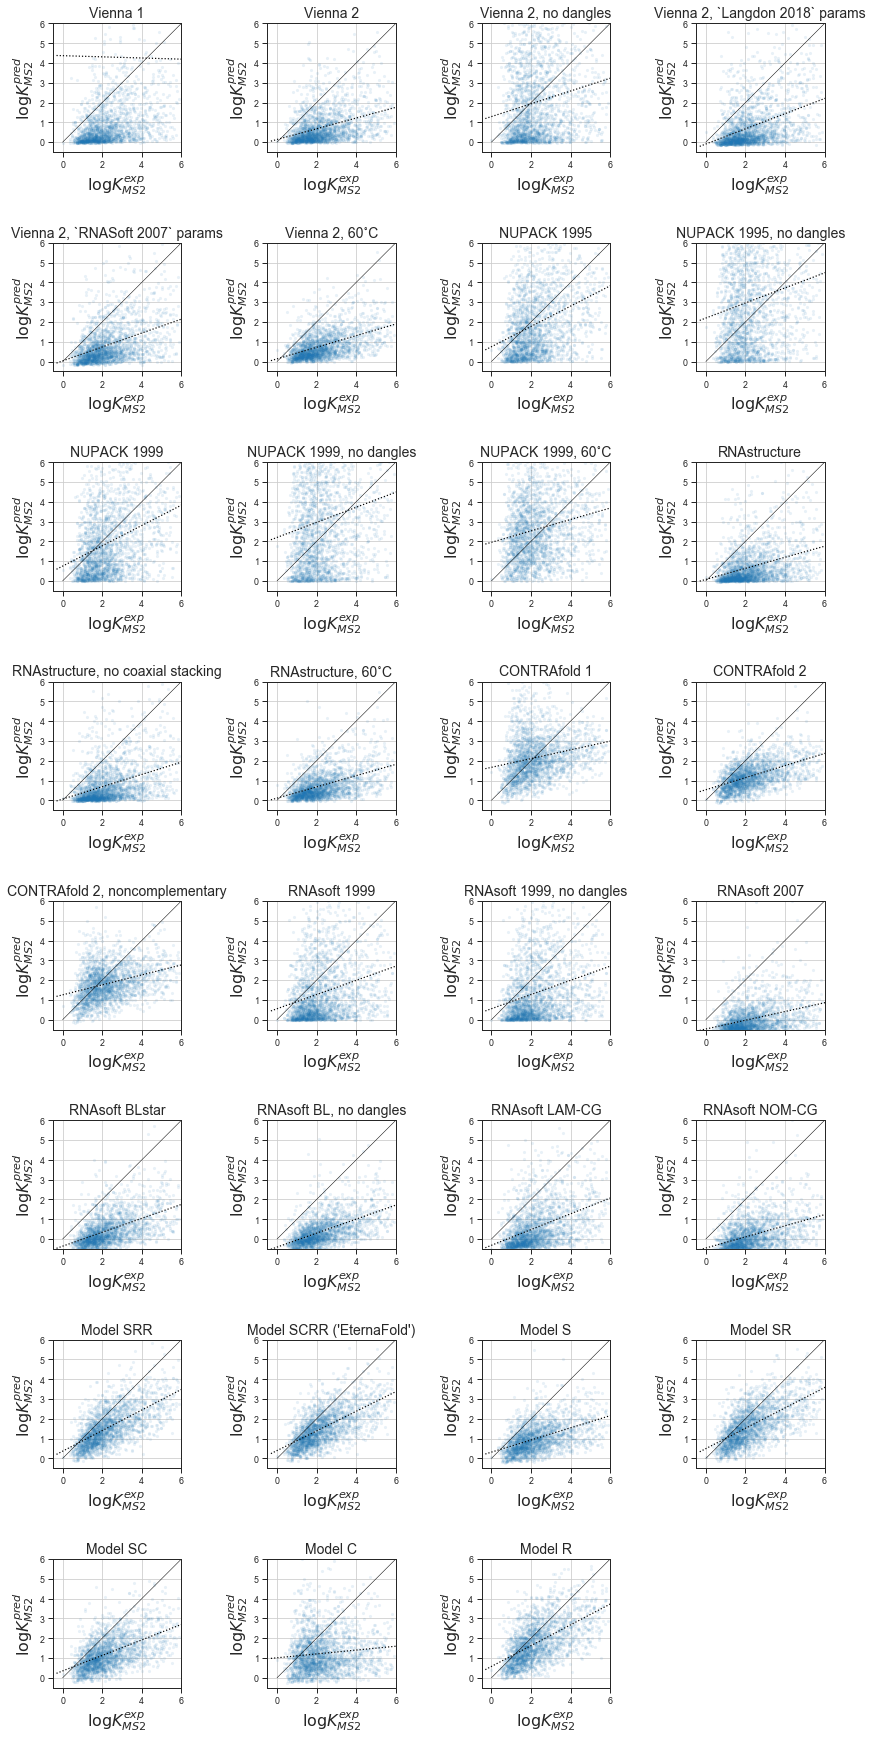

In [3]:
df = pd.read_json('../data/RiboswitchCalculations/RS_by_ds_Ribologic_FMN.json.zip')
packages = eb.plot.get_packages()
df.to_csv('Ribologic_predictions_all_pkgs.csv')

ctr=1
figure(figsize=(12,30))

for pkg, pkg_data in packages.iterrows():
    
    if 'log_kfold_est_bp_%s' % pkg in df.keys():

        subplot(10,4,ctr, aspect='equal')
        sns.scatterplot(x='logkd_nolig_scaled',y='log_kfold_est_bp_%s' % pkg, data=df, alpha=0.1, linewidth=0, s=10)
        x=df['logkd_nolig_scaled']
        y=df['log_kfold_est_bp_%s' % pkg]
        eb.plot.corrfunc(x,y, draw_line=True,method='Pearson')

        xlabel(r'$\log K_{MS2}^{exp}$',fontsize=16)
        ylabel(r'$\log K_{MS2}^{pred}$',fontsize=16)
        title(pkg_data['title'],fontsize=14)
        ylim([-0.5,6])
        xlim([-0.5,6])
        grid()
        plot([0,6],[0,6],color='k',linewidth=0.5)
        
        ctr+=1

tight_layout()
savefig('FIGURES/SI/All_packages_Ribologic_FMN.pdf',bbox_inches='tight')
savefig('FIGURES/SI/All_packages_Ribologic_FMN.png',bbox_inches='tight')

In [8]:
df = pd.read_json('../data/EternaBench_Riboswitch_Filtered_23May2022.json.zip')
df['min_log_kd_val'] = np.log(df['min_kd_val'])
df[['Dataset','sequence','logkd_nolig','logkd_lig', 'min_log_kd_val']].to_csv('SUPP_TABLE_PRECURSORS/ED7c.csv',index=False)

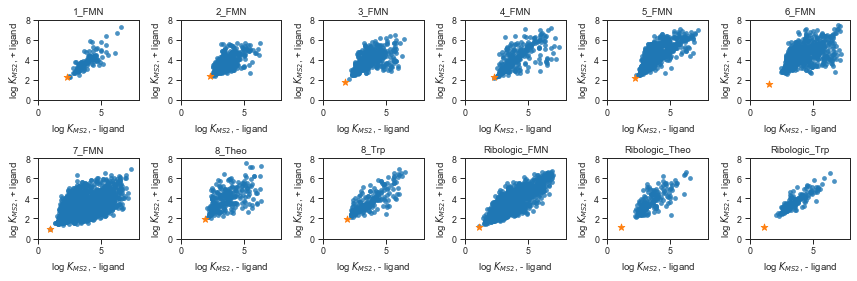

In [11]:
figure(figsize=(12,4))
datasets=['1_FMN','2_FMN', '3_FMN', '4_FMN', '5_FMN', '6_FMN', '7_FMN', '8_Theo','8_Trp','Ribologic_FMN', 'Ribologic_Theo', 'Ribologic_Trp']

for i, dat in enumerate(datasets):
    subplot(2,6,i+1)
    tmp=df.loc[df.Dataset==dat]
    sns.scatterplot(x='logkd_nolig',y='logkd_lig',data=tmp,alpha=0.8,linewidth=0)
    min_kd_val = np.log(tmp.min_kd_val.unique())
    scatter(min_kd_val, min_kd_val,marker='*',s=50)
    title(dat)
    xlabel('log $K_{MS2}$, - ligand')
    ylabel('log $K_{MS2}$, + ligand')
    xlim([0,8])
    ylim([0,8])
    
tight_layout()
savefig('FIGURES/SI/ED7c.png',dpi=300,bbox_inches='tight')

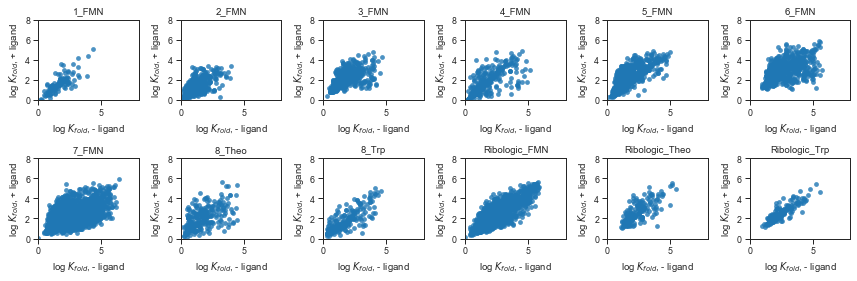

In [12]:
figure(figsize=(12,4))
for i, dat in enumerate(datasets):
    subplot(2,6,i+1)
    tmp=df.loc[df.Dataset==dat]
    sns.scatterplot(x='logkd_nolig_scaled',y='logkd_lig_scaled',data=tmp,alpha=0.8,linewidth=0)

    title(dat)
    xlabel('log $K_{fold}$, - ligand')
    ylabel('log $K_{fold}$, + ligand')
    xlim([0,8])
    ylim([0,8])
    
tight_layout()

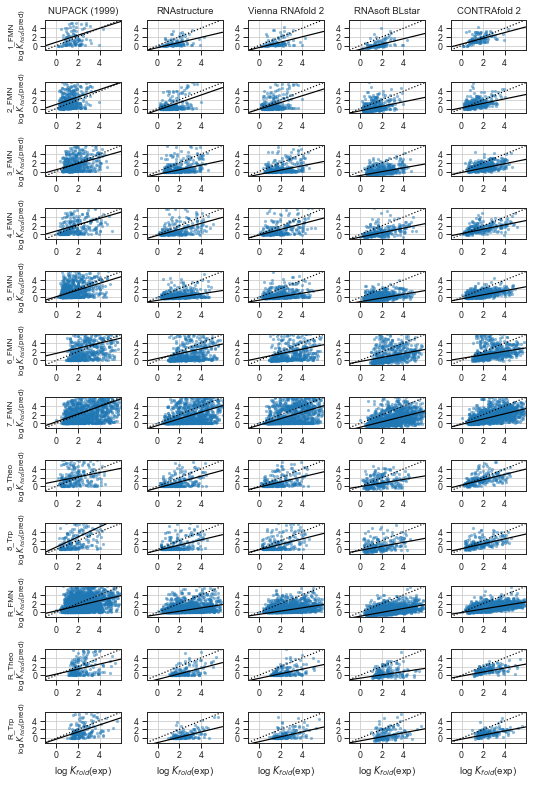

In [18]:
example_package_list=['nupack_99','rnastructure', 'vienna_2', 'rnasoft_blstar', 'contrafold_2']

titles = ['NUPACK (1999)', 'RNAstructure', 'Vienna RNAfold 2', 'RNAsoft BLstar', 'CONTRAfold 2']
xmin=-1
xmax=6

source_data_df = pd.read_json('../data/RiboswitchCalculations/RS_nupack_99_bps.json.zip')

figure(figsize=(7.5,11))
for j, pkg in enumerate(example_package_list):
    tmp0 = pd.read_json('../data/RiboswitchCalculations/RS_%s_bps.json.zip' % pkg)
    source_data_df['log_kfold_est_bp_%s' % pkg] = tmp0['log_kfold_est_bp_%s' % pkg]

    for i, dataset in enumerate(datasets):
        tmp=tmp0.loc[tmp0.Dataset==dataset]
    
        subplot(12,5,i*5+j+1)
        sns.scatterplot(x='logkd_nolig_scaled', y='log_kfold_est_bp_%s' % pkg, data=tmp, alpha=0.5, linewidth=0, s=10)
        x=tmp['logkd_nolig_scaled']
        y=tmp['log_kfold_est_bp_%s' % pkg]
        
        rmse = np.sqrt(np.mean(np.square(x-y)))
        m, b = np.poly1d(np.polyfit(x, y, 1))
        #m, _, _, _ = np.linalg.lstsq(x.values.reshape(-1,1), y.values.reshape(-1,1))

        plot([xmin,xmax],[xmin+b,xmax*m+b],c='k')
        plot([xmin,xmax],[xmin,xmax],linestyle=':',c='k')

#         xlabel(r'$\log K_{MS2}^{exp}$')
#         ylabel(r'$\log K_{MS2}^{pred}$')
        
        if i==0: title("%s" % (titles[j]))

        if j==0:
            ylabel(dataset.replace('Ribologic','R')+'\nlog $K_{fold}$(pred)',fontsize=8)


        else:
            ylabel('')
            
        if i==11:
            xlabel('log $K_{fold}$(exp)')

        else:
            xlabel('')

        xlim([xmin,xmax])
        ylim([xmin,xmax])
        
        legend([],frameon=False)
        yticks([0,2,4])
        xticks([0,2,4])
        grid()
tight_layout()
savefig('FIGURES/SI/ED6.pdf',bbox_inches='tight')
source_data_df.to_csv('SUPP_TABLE_PRECURSORS/ED6.csv')

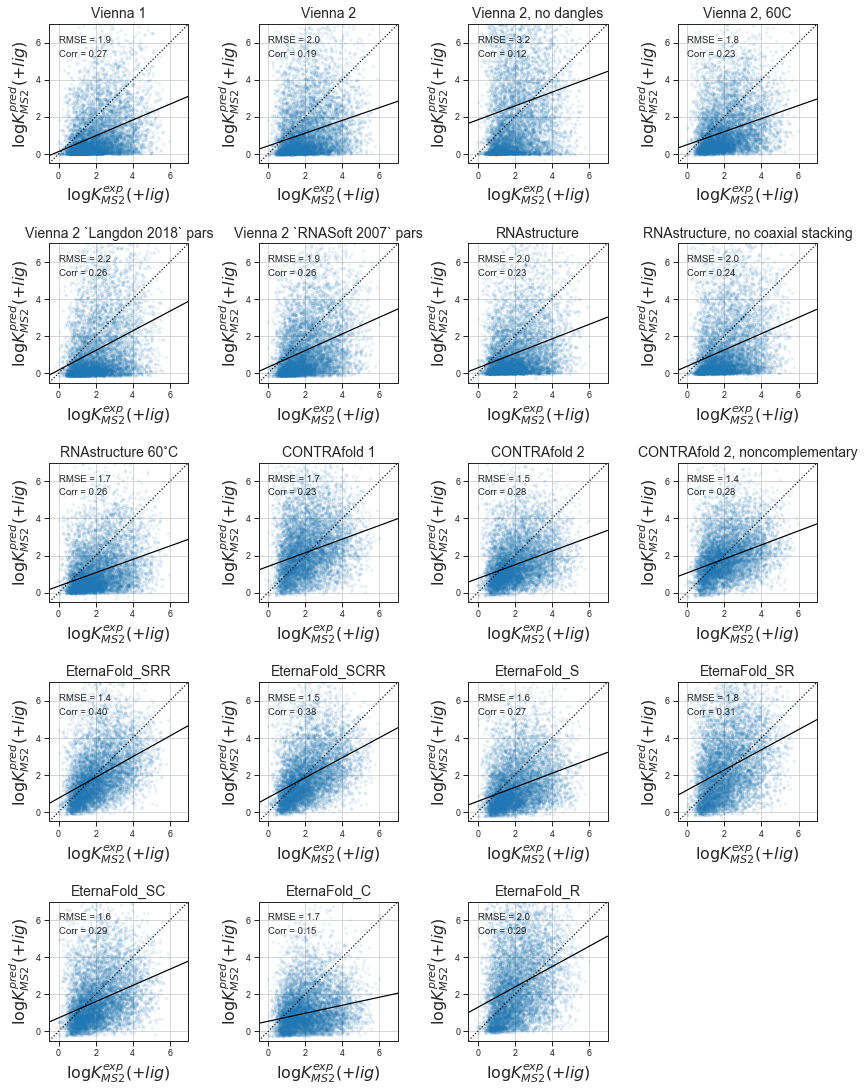

In [52]:
figure(figsize=(12,30))
xmin=-0.5

packages=['vienna_1','vienna_2','vienna_2_nodangles','vienna_2_60C','vienna_langdon_pars','vienna_rnasoft_pars',
          'rnastructure','rnastructure_nocoax','rnastructure_60C','contrafold_1','contrafold_2','contrafold_2_nc',
'eternafold_A','eternafold_B','eternafold_C','eternafold_D','eternafold_E','eternafold_F','eternafold_G']

titles = ['Vienna 1', 'Vienna 2', 'Vienna 2, no dangles',
'Vienna 2, 60C', 'Vienna 2 `Langdon 2018` pars', 'Vienna 2 `RNASoft 2007` pars',
'RNAstructure', 'RNAstructure, no coaxial stacking', 'RNAstructure 60˚C',
'CONTRAfold 1', 'CONTRAfold 2', 'CONTRAfold 2, noncomplementary', 
          'EternaFold_SRR', 'EternaFold_SCRR','EternaFold_S','EternaFold_SR','EternaFold_SC','EternaFold_C','EternaFold_R']

source_data_df = pd.read_json('../data/RiboswitchCalculations/RS_vienna_1_Z.json.zip')

for i, pkg in enumerate(packages):
    tmp = pd.read_json('../data/RiboswitchCalculations/RS_%s_Z.json.zip' % pkg)
    subplot(10,4,i+1,aspect='equal')
    sns.scatterplot(x='logkd_lig_scaled',y='log_kfold_est_lig_Z_%s' % pkg, data=tmp, alpha=0.1, linewidth=0, s=10)
    x=tmp['logkd_lig_scaled']
    source_data_df['log_kfold_est_lig_Z_%s' % pkg] = tmp['log_kfold_est_lig_Z_%s' % pkg]
    y=tmp['log_kfold_est_lig_Z_%s' % pkg]
    rmse = np.sqrt(np.mean(np.square(x-y)))
    corr = np.corrcoef(x,y)[0][1]
    m, b = np.poly1d(np.polyfit(x, y, 1))
    #m, _, _, _ = np.linalg.lstsq(x.values.reshape(-1,1), y.values.reshape(-1,1))

    plot([xmin,7],[xmin+b,7*m+b],c='k')
    plot([xmin,7],[xmin,7],linestyle=':',c='k')

    xlabel(r'$\log K_{MS2}^{exp}(+lig)$',fontsize=16)
    ylabel(r'$\log K_{MS2}^{pred}(+lig)$',fontsize=16)
    title(titles[i],fontsize=14)
    text(0,6,"RMSE = %.1f" % rmse)
    text(0,5.25,"Corr = %.2f" % corr)
    
    xlim([xmin,7])
    ylim([xmin,7])
    xticks([0,2,4,6])
    yticks([0,2,4,6])
    grid()
    
tight_layout()
savefig('FIGURES/SI/All_packages_Kd+lig_Ribologic_FMN.pdf',bbox_inches='tight')
savefig('FIGURES/SI/All_packages_Kd+lig_Ribologic_FMN.png',bbox_inches='tight')
source_data_df.to_csv('SUPP_TABLE_PRECURSORS/ED10b.csv')

In [53]:
! open SUPP_TABLE_PRECURSORS/ED10b.csv